In [22]:
from cube import MiniCube

In [32]:
vMiniCube = np.vectorize(MiniCube)
init_arry = np.arange(27).reshape((3,3,3))

x = np.empty((3,3,3), dtype=object)
for i in range(3):
    for j in range(3):
        for k in range(3):
            x[i,j,k] = MiniCube([i,j,k])

In [40]:
def facePrint(face):
    print(face[:, 2])
    print(face[:, 1])
    print(face[:, 0])

face_array = np.array([[1,2,3],[4,5,6],[7,8,9]])
newcubes = np.zeros((3,3), dtype=int)

ccint = -1
newcubes[::-1*ccint,2] = face_array[0,:]
newcubes[2,::1*ccint] = face_array[:,2]
newcubes[::-1*ccint,0] = face_array[2,:]
newcubes[0,::1*ccint] = face_array[:, 0]
newcubes[1,1] = face_array[1,1]

facePrint(face_array)
print("")
face_array = newcubes

facePrint(face_array)
print("")
facePrint(newcubes)

[3 6 9]
[2 5 8]
[1 4 7]

[1 2 3]
[4 5 6]
[7 8 9]

[1 2 3]
[4 5 6]
[7 8 9]


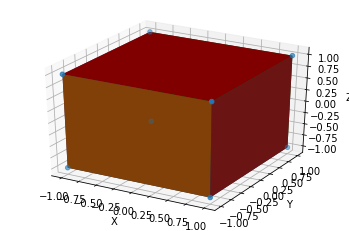

In [21]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

points = np.array([[-1, -1, -1],
                      [1, -1, -1 ],
                      [1, 1, -1],
                      [-1, 1, -1],
                      [-1, -1, 1],
                      [1, -1, 1 ],
                      [1, 1, 1],
                      [-1, 1, 1]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)
ax.plot_surface(X,Y,one,color='r')
ax.plot_surface(X,Y,-one)
ax.plot_surface(X,-one,Y)
ax.plot_surface(X,one,Y)
ax.plot_surface(one,X,Y)
ax.plot_surface(-one,X,Y)
ax.scatter3D(points[:, 0], points[:, 1], points[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [46]:
def render():

    fig = plt.figure()
    plt.title("Rubiks Cube")
    ax = fig.add_subplot(111, projection='3d')
    X = np.array([0,1,0,1]).reshape((2,2))-0.5
    Y = np.array([0,0,1,1]).reshape((2,2))-0.5
    Z = np.array([0]*4).reshape((2,2))
    ax.plot_surface(X,Y,Z, color='b')

    # X, Y = np.meshgrid(r, r)
    # one = np.ones(4).reshape(2, 2)
    # ax.plot_surface(X, Y, one, color=cubie.global_colors[0])
    # ax.plot_surface(X, Y, -one, color=cubie.global_colors[1])
    # ax.plot_surface(X, -one, Y, color=cubie.self.global_colors[3])
    # ax.plot_surface(X, one, Y, color=cubie.global_colors[2])
    # ax.plot_surface(one, X, Y, color=cubie.global_colors[4])
    # ax.plot_surface(-one, X, Y, color=cubie.global_colors[5])
    # ax.scatter3D(points[:, 0], points[:, 1], points[:, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    return

In [100]:
import numpy as np
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


class MiniCube(object):
	
	def __init__(self, position):
		# 0 +X, 1 -X
		# 2 +Y, 3 -Y
		# 4 +Z, 5 -Z
		self.global_colors = ['g', 'b', 'white', 'yellow', 'orange', 'r']
		
		# global position of center
		self.position = [-10] * 3
		for i, p in enumerate(position):
			self.position[i] = p
	
	# #X->X' angle in ccwise direction
	# self.orientation = [0]*3
	
	def rotate(self, axis='X', counterClockWise=True):
		"""
		changes colors of all its faces acc to the roattion
		"""
		ncolors = [None] * 6
		for i in range(6):
			ncolors[i] = self.global_colors[i]
		
		if axis == 'X':
			if counterClockWise:
				ncolors[2] = self.global_colors[5]
				ncolors[3] = self.global_colors[4]
				ncolors[4] = self.global_colors[2]
				ncolors[5] = self.global_colors[3]
			else:
				ncolors[2] = self.global_colors[4]
				ncolors[3] = self.global_colors[5]
				ncolors[4] = self.global_colors[3]
				ncolors[5] = self.global_colors[2]
		elif axis == 'Y':
			if counterClockWise:
				ncolors[0] = self.global_colors[4]
				ncolors[1] = self.global_colors[5]
				ncolors[4] = self.global_colors[1]
				ncolors[5] = self.global_colors[0]
			else:
				ncolors[0] = self.global_colors[5]
				ncolors[1] = self.global_colors[4]
				ncolors[4] = self.global_colors[0]
				ncolors[5] = self.global_colors[1]
		else:
			if counterClockWise:
				ncolors[0] = self.global_colors[3]
				ncolors[1] = self.global_colors[2]
				ncolors[2] = self.global_colors[0]
				ncolors[3] = self.global_colors[1]
			else:
				ncolors[0] = self.global_colors[2]
				ncolors[1] = self.global_colors[3]
				ncolors[2] = self.global_colors[1]
				ncolors[3] = self.global_colors[0]
		
		# flag = 2*int(counterclockwise)-1
		# coords = {'X':0, 'Y':1, 'Z':2}
		# for ax in range(3):
		# 	self.orientation[ax] += (flag*90+360)
		# self.orientation[coords[axis]] -= flag*90
		# for ax in range(3):
		# self.orientation[ax] %= 360
		
		for i in range(6):
			self.global_colors[i] = ncolors[i]
		
		return
	
	def get_colors(self):
		"""
		Return colors of the minicube w.r.t the global axes
		"""
		return self.global_colors
	
	def render(self, title="Title"):
		axes = [2, 1, 4, 0, 3, 5]
		print(" %s \n%s%s%s\n %s \n %s \n" % (self.global_colors[axes[0]][0],
												self.global_colors[axes[1]][0],
												self.global_colors[axes[2]][0],
												self.global_colors[axes[3]][0],
												self.global_colors[axes[4]][0],
												self.global_colors[axes[5]][0]))
		points = np.array([[-1, -1, -1],
						[1, -1, -1],
						[1, 1, -1],
						[-1, 1, -1],
						[-1, -1, 1],
						[1, -1, 1],
						[1, 1, 1],
						[-1, 1, 1]])
		
		fig = plt.figure()
		plt.title(title)
		ax = fig.add_subplot(111, projection='3d')
		r = [-1, 1]
		X, Y = np.meshgrid(r, r)
		one = np.ones(4).reshape(2, 2)
		ax.plot_surface(X, Y, one, color=self.global_colors[0])
		ax.plot_surface(X, Y, -one, color=self.global_colors[1])
		ax.plot_surface(X, -one, Y, color=self.global_colors[3])
		ax.plot_surface(X, one, Y, color=self.global_colors[2])
		ax.plot_surface(one, X, Y, color=self.global_colors[4])
		ax.plot_surface(-one, X, Y, color=self.global_colors[5])
		# ax.scatter3D(points[:, 0], points[:, 1], points[:, 2])
		ax.set_xlabel('Z')
		ax.set_ylabel('Y')
		ax.set_zlabel('X')
		plt.show()
		return
	
	def reset_colors(self):
		self.global_colors = ['g', 'b', 'white', 'yellow', 'orange', 'r']
		return


class Cube(object):
	
	def __init__(self, size):
		super(Cube, self).__init__()
		self.size = size
		self.cubies = np.empty((3, 3, 3), dtype=object)
		for i in range(3):
			for j in range(3):
				for k in range(3):
					self.cubies[i, j, k] = MiniCube([i, j, k])
	
	def face_rotate(self, face="f"):
		ccwise = (face.endswith("'") & ((face[0] == "f") | (face[0] == "r") | (face[0] == "u")))
		ccwise = ccwise | ((len(face) == 1) & ((face == "b") | (face == "l") | (face == "d")))
		ccint = 2 * int(ccwise) - 1
		
		x = None
		if face[0] == "f":
			face_array = self.cubies[:, :, 2]
			self.cubies[:, :, 2] = self.rotate_2d_array(face_array, ccint)
			self.rotate_face_cubies(self.cubies[:, :, 2], 'Z', ccwise)
		
		elif face[0] == "b":
			face_array = self.cubies[:, :, 0]
			x = self.rotate_2d_array(face_array, ccint)
			self.cubies[:, :, 0] = self.rotate_2d_array(face_array, ccint)
			self.rotate_face_cubies(self.cubies[:, :, 0], 'Z', ccwise)
		
		elif face[0] == "r":
			face_array = self.cubies[2, :, :]
			self.cubies[2, :, :] = self.rotate_2d_array(face_array, ccint)
			self.rotate_face_cubies(self.cubies[2, :, :], 'X', ccwise)
		
		elif face[0] == "l":
			face_array = self.cubies[0, :, :]
			self.cubies[0, :, :] = self.rotate_2d_array(face_array, ccint)
			self.rotate_face_cubies(self.cubies[0, :, :], 'X', ccwise)
		
		elif face[0] == "u":
			face_array = self.cubies[:, 2, :]
			self.cubies[:, 2, :] = self.rotate_2d_array(face_array, ccint)
			self.rotate_face_cubies(self.cubies[:, 2, :], 'Y', ccwise)
		
		else:
			face_array = self.cubies[:, 0, :]
			self.cubies[:, 0, :] = self.rotate_2d_array(face_array, ccint)
			self.rotate_face_cubies(self.cubies[:, 0, :], 'Y', ccwise)
		
		for i in range(3):
			for j in range(3):
				for k in range(3):
					self.cubies[i, j, k].position = [i, j, k]
		return x
	
	def rotate_face_cubies(self, face, axis='X', counterClockWise=True):
		cubies = np.reshape(face, (-1))
		for cubie in cubies:
			cubie.rotate(axis, counterClockWise)
	
	def render(self):
		
		fig = plt.figure(figsize=(10,10))
		plt.title("Rubiks Cube")
		ax = fig.add_subplot(111, projection='3d')
		X = np.array([0,1,0,1]).reshape((2,2))-0.5
		Y = np.array([0,0,1,1]).reshape((2,2))-0.5
		Z = np.array([0.]*4).reshape((2,2))
		
		cubies = np.reshape(self.cubies, (-1))
		print(len(cubies))
		for cubie in cubies:
			ax.plot_surface(Z+cubie.position[0]+0.5, X+cubie.position[1], Y+cubie.position[2], color=cubie.global_colors[0], alpha=1) # +X
			ax.plot_surface(Z+cubie.position[0]-0.5, X+cubie.position[1], Y+cubie.position[2], color=cubie.global_colors[1], alpha=1) # -X
			ax.plot_surface(X+cubie.position[0], Z+cubie.position[1]+0.5, Y+cubie.position[2], color=cubie.global_colors[2], alpha=1) # +Y
			ax.plot_surface(X+cubie.position[0], Z+cubie.position[1]-0.5, Y+cubie.position[2], color=cubie.global_colors[3], alpha=1) # -Y
			ax.plot_surface(X+cubie.position[0], Y+cubie.position[1], Z+cubie.position[2]+0.5, color=cubie.global_colors[4], alpha=1) # +Z
			ax.plot_surface(X+cubie.position[0], Y+cubie.position[1], Z+cubie.position[2]-0.5, color=cubie.global_colors[5], alpha=1) # -Z
		
		ax.set_xlabel('X')
		ax.set_ylabel('Y')
		ax.set_zlabel('Z')
		plt.show()
		return
	
	def rotate_2d_array(self, face_array, ccint):
		cubies = [MiniCube([0, 0, 0]) for _ in range(self.size*self.size)]
		newcubes = np.array(cubies)
		newcubes = np.resize(newcubes, (self.size, self.size))
		
		# newcubes[::-1 * ccint, 2] = face_array[0, :]
		# newcubes[2, ::1 * ccint] = face_array[:, 2]
		# newcubes[::-1 * ccint, 0] = face_array[2, :]
		# newcubes[0, ::1 * ccint] = face_array[:, 0]
		
		self.copyCubies(newcubes[::-1 * ccint, 2] , face_array[0, :])
		self.copyCubies(newcubes[2, ::1 * ccint] , face_array[:, 2])
		self.copyCubies(newcubes[::-1 * ccint, 0] , face_array[2, :])
		self.copyCubies(newcubes[0, ::1 * ccint] , face_array[:, 0])
		self.copyCubies(newcubes[1:2, 1], face_array[1:2, 1])
		# print(newcubes)
		return newcubes
	
	def copyCubies(self, a, b):
		for _a, _b in zip(list(a),list(b)):
			_a.position = _b.position
			_a.global_colors = _b.global_colors
		return
	
	
myCube = Cube(3)


 w 
bog
 y 
 r 



/home/a-koneti/virtual-envs/tf-cpu-pip3/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


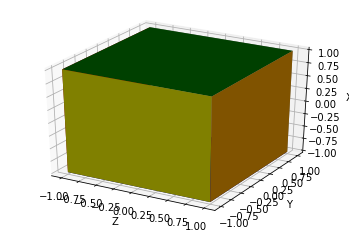

In [102]:
myCube.cubies[0,0,0].render()

In [103]:
myCube.face_rotate('b')

array([[<__main__.MiniCube object at 0x7ff3d5eaf9e8>,
        <__main__.MiniCube object at 0x7ff3d5a02860>]], dtype=object)

 y 
gob
 w 
 r 



/home/a-koneti/virtual-envs/tf-cpu-pip3/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


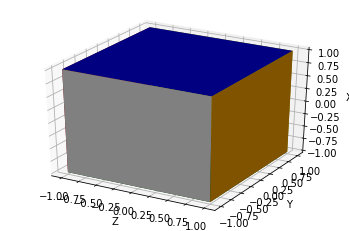

In [104]:
myCube.cubies[2,0,0].render()